# Ungraded Lab - Trees Ensemble

In this notebook, you will:

 - Use Pandas to perform one-hot encoding of a dataset
 - Use scikit-learn to implement a Decision Tree, Random Forest and XGBoost models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55 #We will pass it to every sklearn call so we ensure reproducibility

## 1. INTRODUCTION

###Dataset

* this dataset is obtained from kaggle: Heart Failure Prediction Dataset

###Context

*Cardiovascular disease(CVDs) is the number 1 cause of death, 31% of all deaths worlwide.  For out of five CVD deaths are due to heart attacksand strocks and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs

###Attribute information

*Age: age of the patient[years]

*Sex: sex of the patient[M:Male, F:Female]

*ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical angina, NAP: Non-anginal pain, ASY: Asymptomatic]

*Resting BP: resting blood pressure[mm hg]

*Chlesterol: serum cholesterol [mm Hg]

*FastingBS: fasting bllod sugar[1: if FastingBS | 120 mg/dl, 0: otherwise]

*Resting ECG: resting electrocardiogram results [Normal: Normal, ST: having ST-t wabe abnormality(T Wave inversions and or ST elevation or depression of > 0.05 mV, LVH: showing probable or definite left ventricular hypetrophy by Este`s criteria)]

*MaxHR: maximum heart achieved[Numeric value between 60 a 202]

*ExcerciseAngina: exercise-induced angina [Y:yes, N:No]

*Oldpeark: oldpeak = ST[Numeric value measured in depression]

*ST_Slope: the slope of the peak exercise ST segment [Up. upsloping, Flat:flat, Down: downsloping]

*HeartDisease: Output class [1:heart disease, 0: normal]



Let's now load the dataset. As we can see above, the variables:

- Sex
- ChestPainType
- RestingECG
- ExerciseAngina
- ST_Slope

Are *categorical*, so we must one-hot encode them.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/'
filename = 'heart.csv'

In [ ]:
# 'Here we load the dataset using pandas
df = pd.read_csv(f"{path}{filename}")

In [ ]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## 2. One-hot encoding with Pandas

First we will remove the binary variables, because one-hot encoding them would do nothing to them. To achieve this we will just count how many different values there are in each categorical variable and consider only the variables with 3 or more values.

In [ ]:
categorical_variables =  ['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

Pandas has a built-in method to one-hot encode variables, it is the function `pd.get_dummies`. There are several arguments to this function, but here we will use only a few. They are:

 - data: DataFrame to be used
 - prefix: A list with prefixes, so we know which value we are dealing with
 - columns: the list of columns that will be one-hot encoded. 'prefix' and 'columns' must have the same length.

For more information, you can always type `help(pd.get_dummies)` to read the function's full documentation.

In [ ]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
df = pd.get_dummies(data = df,
                         prefix = categorical_variables,
                         columns = categorical_variables)

In [ ]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


###Defining features for variables and target:

- The target is `HeartDisease`.
- All other variables are features that can potentially be used to predict the target, `HeartDisease`.

In [ ]:
features = [x for x in df.columns if x not in 'HeartDisease'] #Here I use a list comprehension to extract a list of features from
#The output of the df.columns index array.

In [ ]:
print(features)
print(f'#number of features: {len(features)}')

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
#number of features: 20


# 3. Splitting the Dataset

In this section, I  plit this dataset into train and test datasets. using the function `train_test_split` from Scikit-learn.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[features],
                                                  df['HeartDisease'],
                                                  train_size= 0.8,
                                                  random_state=RANDOM_STATE
                                                  )

This previus function doest a split in df dataset, it filters df using features list (that excludes HeartDiseaseColumn), it also asings a 80% of the data to train datasets(X_train, y_train)

In [ ]:
print(f'train samples: {len(X_train)}\validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734alidation samples: 184
target proportion: 0.5518


In [ ]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn import preprocessing

In [ ]:
correlation = df.corr()

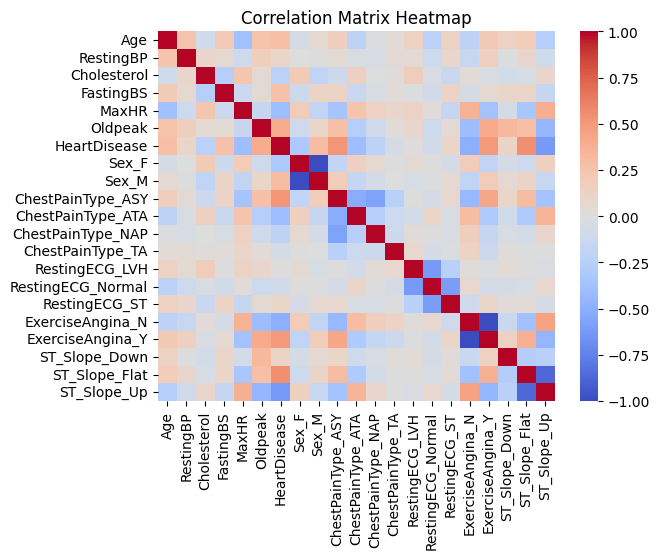

In [ ]:
sns.heatmap(correlation, cmap='coolwarm')

# set the plot title
plt.title('Correlation Matrix Heatmap')

# display the plot
plt.show()

The most important associations are evident for Age, FastingBS, Oldpeak, masculine sex, Exercise Angina and ST_slope_up

In [ ]:
X = df[features]
y = df['HeartDisease']

# 4. Building the Models

## 4.1 Decision Tree


The hyperparameters we will use and investigate here are:

 - min_samples_split: The minimum number of samples required to split an internal node.
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - max_depth: The maximum depth of the tree.
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.


In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

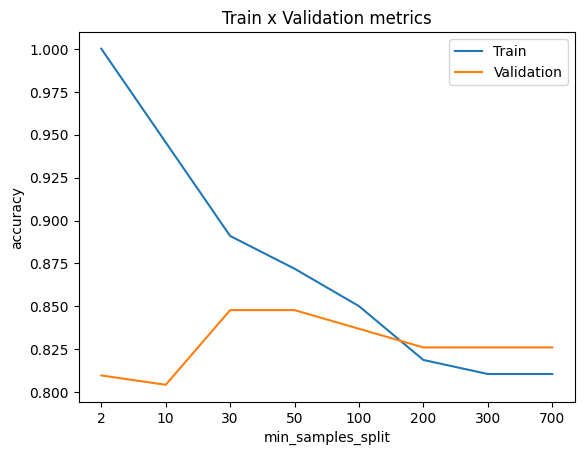

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
  model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                 random_state=RANDOM_STATE).fit(X_train, y_train)
  predictions_train = model.predict(X_train) #this are the predicted values for the train dataset
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train, y_train)
  accuracy_val = accuracy_score(predictions_val, y_val)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

$if \ we \ make \ the \ samples \ greater,\ then \  the \ overfitting\ (that \ is \ measured \ as \ the \ difference \ between \ validation \ and \ training \ accuracy) \ tends \ to \ get \ lower \  and \ lower$

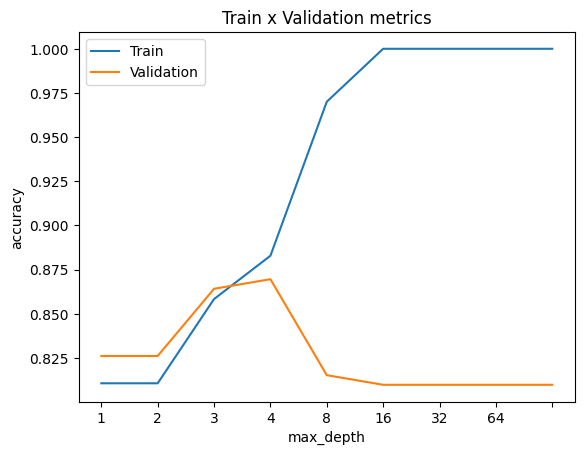

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

We can see that in general, reducing `max_depth` can help to reduce overfitting.
- Reducing `max_depth` from 8 to 4 increases validation accuracy closer to training accuracy, while significantly reducing training accuracy.
- The validation accuracy reaches the highest at tree_depth=4.
- When the `max_depth` is smaller than 3, both training and validation accuracy decreases.  The tree cannot make enough splits to distinguish positives from negatives (the model is underfitting the training set).
- When the `max_depth` is too high ( >= 5), validation accuracy decreases while training accuracy increases, indicating that the model is overfitting to the training set.

So we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 4`
- `min_samples_split = 50`

In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8583
Metrics validation:
	Accuracy score: 0.8641


## 4.2 Random Forest

the Random Forest algorithm also, using the Scikit-learn implementation.
- All of the hyperparameters found in the decision tree model will also exist in this algorithm, since a random forest is an ensemble of many Decision Trees.
- One additional hyperparameter for Random Forest is called `n_estimators` which is the number of Decision Trees that make up the Random Forest.

Remember that for a Random Forest, we randomly choose a subset of the features AND randomly choose a subset of the training examples to train each individual tree.
- Following the lectures, if $n$ is the number of features, we will randomly select $\sqrt{n}$ of these features to train each individual tree.
- Note that you can modify this by setting the `max_features` parameter.

You can also speed up your training jobs with another parameter, `n_jobs`.
- Since the fitting of each tree is independent of each other, it is possible fit more than one tree in parallel.
- So setting `n_jobs` higher will increase how many CPU cores it will use. Note that the numbers very close to the maximum cores of your CPU may impact on the overall performance of your PC and even lead to freezes.
- Changing this parameter does not impact on the final result but can reduce the training time.

We will run the same script again, but with another parameter, `n_estimators`, where we will choose between 10,

In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

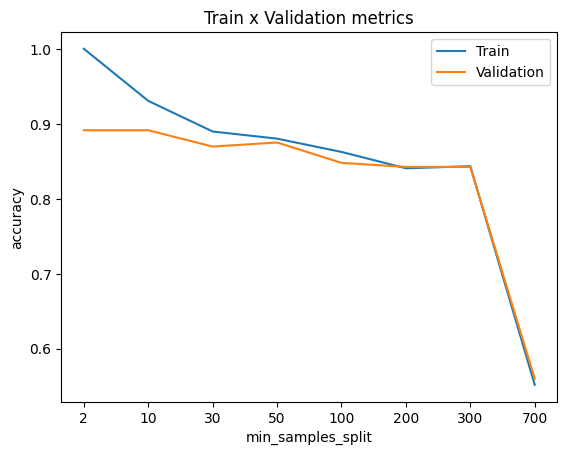

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

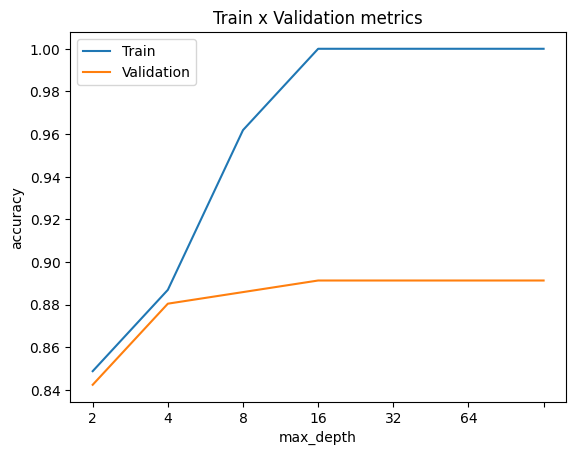

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

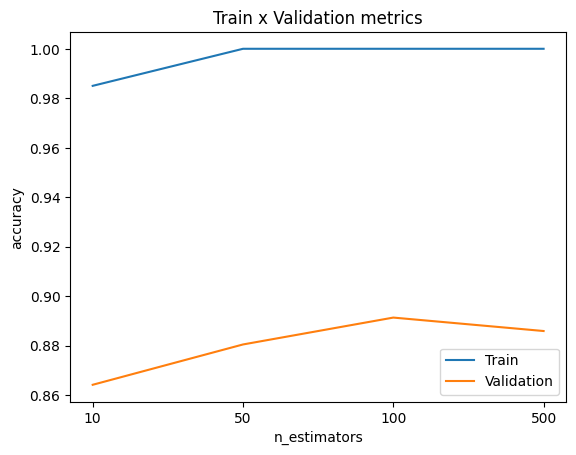

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

we should fit a random forest with this parameters

 - max_depth: 16
 - min_samples_split: 10
 - n_estimators: 100

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 16,
                                             min_samples_split = 10).fit(X_train,y_train)

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8913


## 4.3 XGBoost

Next is the Gradient Boosting model, called XGBoost. The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error.

The model has the same parameters as a decision tree, plus the learning rate.
- The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.

One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form `(X_val,y_val)`.
- On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
- Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop.
- More iterations lead to more estimators, and more estimators can result in overfitting.  
- By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.

First, let's define a subset of our training set (we should not use the test set here).

In [ ]:
n = int(len(X_train)*0.8) ##let's use 80% to train and 20% to eval

In [ ]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

Note some of the `.fit()` parameters:
- `eval_set = [(X_train_eval,y_train_eval)]`:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets.
- `early_stopping_rounds`: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.
  - The model keeps track of the round with the best performance (lowest evaluation metric).  For example, let's say round 16 has the lowest evaluation metric so far.
  - Each successive round's evaluation metric is compared to the best metric.  If the model goes 10 rounds where none have a better metric than the best one, then the model stops training.
  - The model is returned at its last state when training terminated, not its state during the best round.  For example, if the model stops at round 26, but the best round was 16, the model's training state at round 26 is returned, not round 16.
  - Note that this is different from returning the model's "best" state (from when the evaluation metric was the lowest).

In [ ]:
pip install --upgrade xgboost


In [ ]:
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=RANDOM_STATE,  early_stopping_rounds=20)
xgb_model.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)])

[0]	validation_0-logloss:0.63302
[1]	validation_0-logloss:0.59554
[2]	validation_0-logloss:0.56614
[3]	validation_0-logloss:0.54187
[4]	validation_0-logloss:0.52349
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.49373
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.47323
[9]	validation_0-logloss:0.46538
[10]	validation_0-logloss:0.46000
[11]	validation_0-logloss:0.45621
[12]	validation_0-logloss:0.45483
[13]	validation_0-logloss:0.44975
[14]	validation_0-logloss:0.44495
[15]	validation_0-logloss:0.44073
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43936
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44322
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419
[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206
[27]	validation_0-logloss:0.45435
[28]	validation_0-logloss:0.45316
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

Even though we initialized the model to allow up to 500 estimators, the algorithm only fit 26 estimators (over 26 rounds of training).

To see why, let's look for the round of training that had the best performance (lowest evaluation metric).  You can either view the validation log loss metrics that were output above, or view the model's `.best_iteration` attribute:

In [ ]:
xgb_model.best_iteration

17

The best round of training was round 16, with a log loss of 4.3948.  
- For 10 rounds of training after that (from round 17 to 26), the log loss was higher than this.
- Since we set `early_stopping_rounds` to 10, then by the 10th round where the log loss doesn't improve upon the best one, training stops.
- You can try out different values of `early_stopping_rounds` to verify this.  If you set it to 20, for instance, the model stops training at round 36 (16 + 20).

In [ ]:
accuracy_score(xgb_model.predict(X_train),y_train)

0.9318801089918256

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8533
